# Algeria Forest Fires Prediction

## Import Libraries 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Import Dataset

In [104]:
forest_fires_data = pd.read_csv('dataset/Algerian_forest_fires.csv')
forest_fires_data.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


### Remove Header

In [105]:
forest_fires_data = pd.read_csv('dataset/Algerian_forest_fires.csv', header=1)
forest_fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Exploratory Data Analysis

<b>View Columns<b>

In [106]:
forest_fires_data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

<b> Remove whitespaces from column names <b>

In [107]:
for column in forest_fires_data.columns:
    new_column = column.strip()
    forest_fires_data.rename(columns={column: new_column}, inplace=True)
forest_fires_data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

<b>First top 5 rows from forest_fires_data<b>

In [108]:
forest_fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


<b>Describe forest_fires_data<b>

In [109]:
forest_fires_data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,22,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


<b>Dataset Info<b>

In [110]:
forest_fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


<b>Get dimension and number of of the dataset<b>

In [111]:
print(f'Dimension is {forest_fires_data.ndim}')

Dimension is 2


In [112]:
print(f'Rows and Columns {forest_fires_data.shape}')

Rows and Columns (246, 14)


<b>Find Missing Values<b>

In [113]:
forest_fires_data.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

<AxesSubplot:>

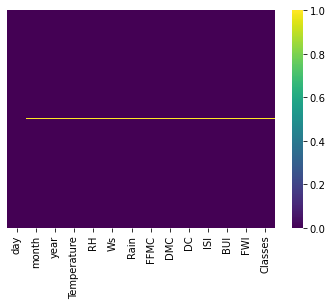

In [114]:
sns.heatmap(forest_fires_data.isnull(), xticklabels=True, yticklabels=False, cmap='viridis')

<b>Inference</b>

Null values present in every column except 'day'. Maximum null values were 2. Classes column has 2 null values while other columns have 1 null value.

<b>Find row wise null values</b>

In [115]:
forest_fires_data[forest_fires_data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


**Inference:**

From above data it is clear that from index 0 to 121,the data is related to Bejaia Region and from index 122, data is related to Sidi-Bel Abbes Region. So for partitioning this,  a new column is added named **Region** and for *Bejaia Region* is labelled as 1 and for *Sidi-Bel Abbes Region* is labelled as 2. Then deleting 122nd row since all other values are null.

On 167th row, it is clearly visible that in column DC, the values are misplaced. So shift the values to right. So that the row also get cleared.

In [116]:
forest_fires_data.loc[:122, 'Region'] = 1 # 1 for Bejaia Region
forest_fires_data.loc[122:, 'Region'] = 2 # 2 for Sidi Bel Abbes Region
forest_fires_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


<b>Delete 122nd Record</b>

In [117]:
forest_fires_data.drop(122, inplace=True)

<b>Splitting Column DC of 167th Row</b>

In [118]:
DC_Split=forest_fires_data.iloc[166]['DC'].split(' ')
forest_fires_data.loc[167, 'DC'] = DC_Split[0]

In [119]:
forest_fires_data.iloc[[166]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN,2.0


<b>Save ISI column value to new variable</b>

In [120]:
ISI_Col = forest_fires_data.loc[167, 'ISI']

# 2nd part of splitted DC is assigned to ISI
forest_fires_data.loc[167, 'ISI'] = DC_Split[1]

<b>Save BUI column value to new variable</b>

In [121]:
BUI_Col = forest_fires_data.loc[167, 'BUI']

# Assign ISI_Col value to BUI
forest_fires_data.loc[167, 'BUI'] = ISI_Col

<b>Save FWI column value to a variable<b>

In [122]:
FWI_Col = forest_fires_data.loc[167, 'FWI']

# Assign BUI_Col value to FWI
forest_fires_data.loc[167, 'FWI'] = BUI_Col

# Assign FWI_Col value to Classes
forest_fires_data.loc[167, 'Classes'] = FWI_Col

In [123]:
forest_fires_data.loc[[167]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire,2.0


<b>Check Missing Values<b>

In [124]:
forest_fires_data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Inference:**

No missing Values in the dataset.

<b>Get All Unique Value<b>

In [125]:
forest_fires_data.nunique()

day             32
month            5
year             2
Temperature     20
RH              63
Ws              19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            174
FWI            128
Classes          9
Region           2
dtype: int64

In [126]:
for feature in forest_fires_data.columns:
    # choose the features whose unique values are less than 10.
    if len(forest_fires_data[feature].unique()) <= 10:
        print(f'Unique values of {feature} are {forest_fires_data[feature].unique()}')

Unique values of month are ['06' '07' '08' '09' 'month']
Unique values of year are ['2012' 'year']
Unique values of Classes are ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ' 'Classes  '
 'not fire     ' 'not fire    ']
Unique values of Region are [1. 2.]


<b>Inference<b>

    * In month column there are 5 unique values, in which there is a value called 'month'. Remove the row containing column value 'month'.
    * In year column there are 2 unique values, in which there is a value called 'year'. Remove the row containing column value 'year'.
    * In Classes column, there are whitespaces on both ends. So remove them.
    * In Region column, 2 unique value 1 and 2.

<b>Find Row with value month under month column<b>

In [127]:
forest_fires_data[forest_fires_data['month']=='month']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2.0


In [128]:
# Remove this invalid row,
forest_fires_data.drop(123, inplace=True)

In [129]:
# check above row is removed or not
forest_fires_data[forest_fires_data['month']=='month']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


<b>Find row with valuer year under year column<b>

In [130]:
forest_fires_data[forest_fires_data['year'] == 'year']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


**Inference:**

    * No rows exist with that value.

<b>Remove whitespace from Classes column<b>

In [131]:
for col_value in forest_fires_data['Classes'].unique():
    new_col_val = col_value.strip() # remove white spaces
    forest_fires_data.loc[forest_fires_data['Classes'] == col_value, 'Classes'] = new_col_val # assign updated column values to Classes

In [132]:
forest_fires_data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

<b>Convert Column data types to int32 type<b>

In [133]:
forest_fires_data.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

Convert datatypes of day, month, year, Temperature, RH, Ws and Region to int32 type.

In [134]:
features = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']
for feature in features:
    forest_fires_data[feature] = forest_fires_data[feature].astype('int32')
forest_fires_data.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

Convert datatypes of Rain, FFMC, DMC, DC, ISI, BUI and FWI to float64 type.

In [135]:
features = forest_fires_data.columns[6:13].tolist()
features

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [136]:
for feature in features:
    forest_fires_data[feature] = forest_fires_data[feature].astype('float64')
forest_fires_data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

<b>Fixing Duplicate Rows</b>

In [137]:
forest_fires_data.loc[forest_fires_data.duplicated(), :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


**Inference:**

No duplciate records in dataset.

<b>Map month number to month name</b>

In [138]:
forest_fires_data['month']

0      6
1      6
2      6
3      6
4      6
      ..
241    9
242    9
243    9
244    9
245    9
Name: month, Length: 244, dtype: int32

In [139]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [140]:
forest_fires_data['month'] = forest_fires_data['month'].map(month_names)

In [141]:
forest_fires_data['month']

0           June
1           June
2           June
3           June
4           June
         ...    
241    September
242    September
243    September
244    September
245    September
Name: month, Length: 244, dtype: object

<b>Map Classes column with 0 and 1<b>

Add a new column Class with mapped values.

* 0 = not Fire
* 1 = fire

In [142]:
forest_fires_data['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 244, dtype: object

In [143]:
forest_fires_data['Class']=forest_fires_data['Classes'].map({
    'not fire': 0,
    'fire': 1
})

In [144]:
forest_fires_data[['Class', 'Classes']].head()

,Class,Classes
0,0,not fire
1,0,not fire
2,0,not fire
3,0,not fire
4,0,not fire
